# Install Pillow Modules

In [1]:
!pip install --upgrade Pillow

# Import Modules

In [2]:
from PIL import Image
import matplotlib.pyplot as plt


# Read Image

In [3]:
#  Read Image
#    -> lazy-operation : (Don't read the whole file till we need that!)
im = Image.open('image.jpg')

print(im.format, im.size, im.mode)

#  mode:
#    - L : (Luminance) for grayscale images
#    - RGB : True color images
#    - CMYK : pre-press images

JPEG (512, 319) RGB


# Display Image

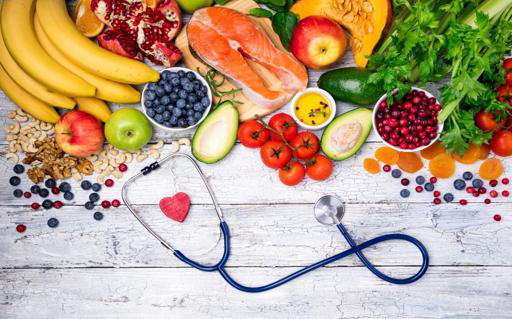

In [4]:
#  ipython method
#    Easy to use!
im

In [5]:
#  Pillow Method:
#    Save it in a temporary file and use out utilities to display
im.show()

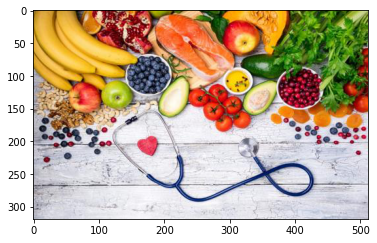

In [6]:
# Using Matplotlib
plt.imshow(im)

#  Write Image

In [6]:
im.save('mysavedimage.png')

# Manipulate Image

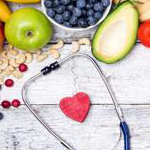

In [7]:
box = (100, 100, 250, 250) # (left, upper, right, lower)
region = im.crop(box)
region

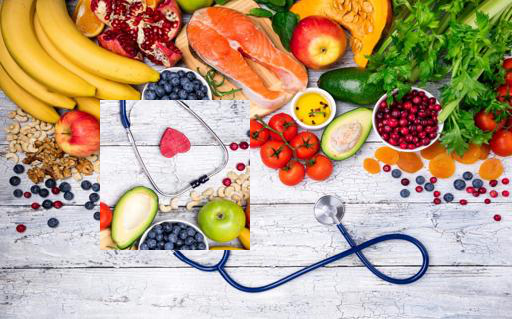

In [8]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
im

None (512, 319) L


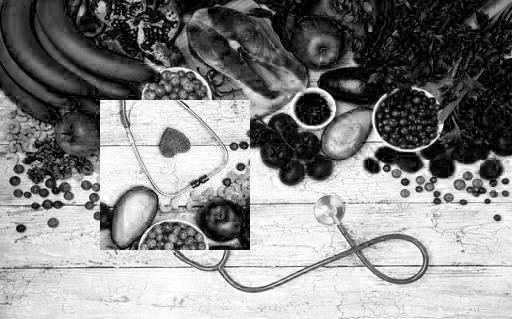

In [11]:
# Spliting and Merging
r, g, b = im.split()

print(r.format, r.size, r.mode)
b

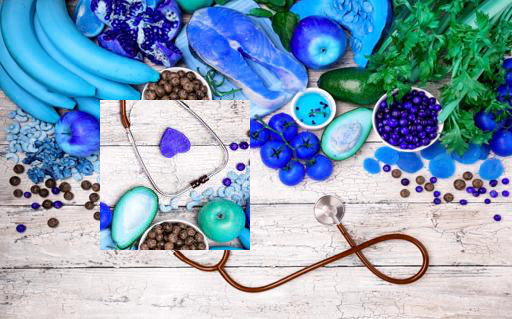

In [16]:
# Construct an Image
im2 = Image.merge("RGB", (b, g ,r))
im2

# Geometrical transforms

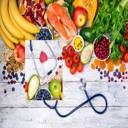

In [13]:
#  Image.resize
out = im.resize((128, 128))
out

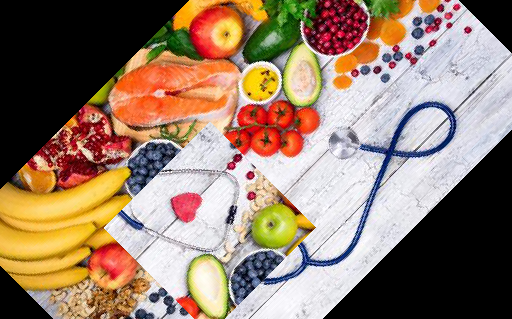

In [19]:
#  Image.rotate (Expand Flag)
out = im.rotate(45)
out

# Transposing an image


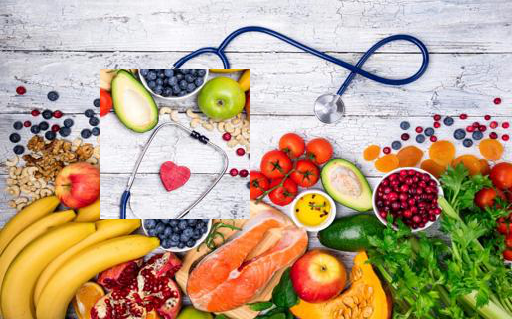

In [20]:
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.transpose(Image.ROTATE_270)
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out

# Color transforms


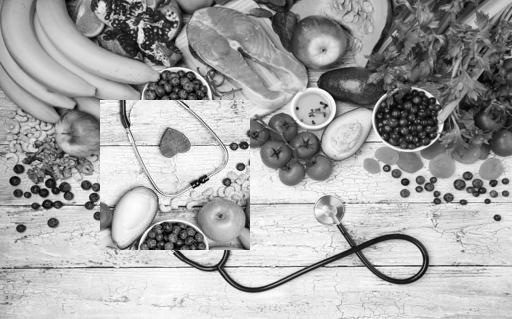

In [18]:
out = im.convert('L')
out

# Image enhancement


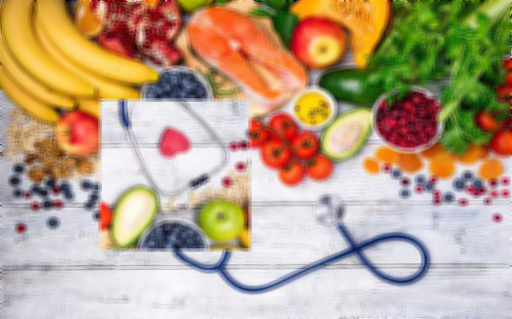

In [21]:
#  Filters
#
#    BLUR
#    CONTOUR
#    DETAIL
#    EDGE_ENHANCE
#    EDGE_ENHANCE_MORE
#    EMBOSS
#    FIND_EDGES
#    SHARPEN
#    SMOOTH
#    SMOOTH_MORE

from PIL import ImageFilter
out = im.filter(ImageFilter.BLUR)
out

# Point Operations


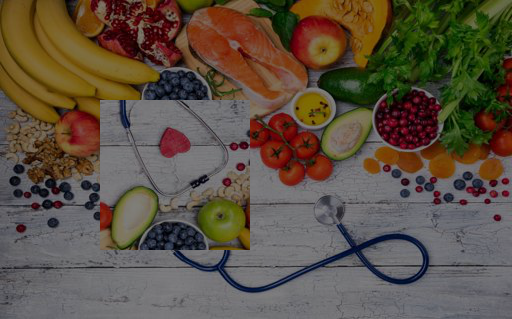

In [24]:
#  multiply each pixel by 1.2
out = im.point(lambda i: i*0.5)
out

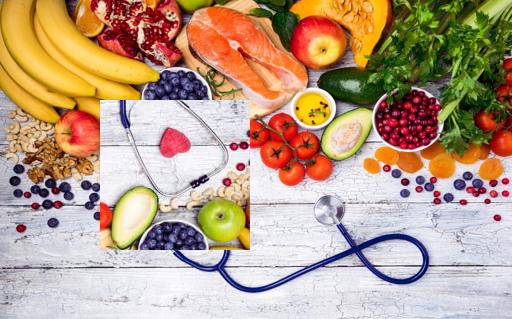

In [26]:
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)
im

# Out to np.ndarray

In [28]:
import numpy as np
img = np.array(im)
img.shape

(319, 512, 3)